In [10]:
# import numpy as np
import pandas as pd
from json import dump

In [ ]:
!wget --no-check-certificate -r "https://docs.google.com/uc?export=download&id=1NYa2gPUgiv8kdS0IinKp6dNMqxELiMGu" -O "data.csv"

will be placed in the single file you specified.

--2021-12-01 18:50:07--  https://docs.google.com/uc?export=download&id=1NYa2gPUgiv8kdS0IinKp6dNMqxELiMGu
Resolving docs.google.com (docs.google.com)... 142.250.73.206, 2607:f8b0:4004:82a::200e
Connecting to docs.google.com (docs.google.com)|142.250.73.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-c8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gl5v1tjuicmaeco9j4fdgo8jvdqqmtgh/1638384600000/17182296012637223398/*/1NYa2gPUgiv8kdS0IinKp6dNMqxELiMGu?e=download [following]
--2021-12-01 18:50:08--  https://doc-0k-c8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gl5v1tjuicmaeco9j4fdgo8jvdqqmtgh/1638384600000/17182296012637223398/*/1NYa2gPUgiv8kdS0IinKp6dNMqxELiMGu?e=download
Resolving doc-0k-c8-docs.googleusercontent.com (doc-0k-c8-docs.googleusercontent.com)... 172.217.13.65, 2607:f8b0:4004:808::2001
Connecting to doc-0k-c8

In [3]:
dataR = pd.read_csv("data.csv")

dataR.columns

In [4]:
data = dataR.drop("Timestamp", axis=1)

In [ ]:
data

In [ ]:
data.keys()

In [5]:
smry = {}
for q in data.keys():
    smry[q] = {}
    l = 0
    for i in range(312):
        try: data[q][i] = smry[q][data[q][i]]
        except KeyError:
            smry[q][data[q][i]] = l
            l += 1
            data[q][i] = smry[q][data[q][i]]

In [ ]:
max(data["What do you think is the most important stimulus to a scientist"])

12

In [6]:
q = "What do you think is the most important stimulus to a scientist"

for i in range(312):
    if data[q][i] in [0, 1]: pass
    elif data[q][i] == 3: data[q][i] = 2
    else: data[q][i] = 3

smry[q]
to_del = []
for ans, ind in smry[q].items():
    if ind in [0, 1]: pass
    elif ind == 3: smry[q][ans] = 2
    else: to_del.append(ans)
for i in to_del: del smry[q][i]
smry[q]["Others"] = 3

In [15]:
smry

{'Whom do you consider an ideal scientist?': {'Someone who studies science and has a decent amount of knowledge on the subject': 0,
  'Someone who helps the society to utilize science': 1,
  'Someone whose only aim is development of science': 2,
  'Someone who enjoys to work with science and takes it as a career': 3},
 'What should be the most accurate metrics to judge the caliber of a scientist?': {'The amount of knowledge and wisdom which one has': 0,
  'The impact which he/she is making on the society': 1,
  'Number of good publications and patents': 2,
  'His bank-balance /social status/fame': 3},
 'What according to you should be the minimum educational qualification one should have to be considered a scientist?': {'10th pass': 0,
  'Does Not matter': 1,
  'Doctorate': 2,
  'Post Doctorate': 3,
  'Post Graduate': 4,
  'Graduate': 5,
  '12th pass': 6},
 'What do you think should be the most developed trait which one should have to become a successful scientist?': {'Intelligence': 0

In [13]:
smry
with open("summary.json", "w") as f:
    dump(f, dict(smry))

TypeError: Object of type TextIOWrapper is not JSON serializable

In [ ]:
smry.keys()

dict_keys(['Whom do you consider an ideal scientist?', 'What should be the most accurate metrics to judge the caliber of a scientist?', 'What according to you should be the minimum educational qualification one should have to be considered a scientist?', 'What do you think should be the most developed trait which one should have to become a successful scientist?', "What is the first thought which you have when you hear the word 'Scientist'", 'Why do you think people want to be a scientist?', 'What should be a scientist’s first priority?', 'Do you think that scientists should be allowed to conduct unethical experiments for the sake of science', 'Should a scientist prioritize science over social ethics and social norms for the sake of greater good', 'What do you think is the most important stimulus to a scientist', 'How  do scientists help common people?', 'Are scientists more biased towards theoretical aspects of science rather than the practical side of it.', 'Do you think that scienti

In [ ]:
for q in smry.keys():
    print(q)
    for key, value in smry[q].items():
        print("\t", value, key)
    print()

Whom do you consider an ideal scientist?
	 0 Someone who studies science and has a decent amount of knowledge on the subject
	 1 Someone who helps the society to utilize science
	 2 Someone whose only aim is development of science
	 3 Someone who enjoys to work with science and takes it as a career

What should be the most accurate metrics to judge the caliber of a scientist?
	 0 The amount of knowledge and wisdom which one has
	 1 The impact which he/she is making on the society
	 2 Number of good publications and patents
	 3 His bank-balance /social status/fame

What according to you should be the minimum educational qualification one should have to be considered a scientist?
	 0 10th pass
	 1 Does Not matter
	 2 Doctorate
	 3 Post Doctorate
	 4 Post Graduate
	 5 Graduate
	 6 12th pass

What do you think should be the most developed trait which one should have to become a successful scientist?
	 0 Intelligence
	 1 Innovative
	 2 Foresight
	 3 High motivation
	 4 Hardworking
	 5 Creat

In [ ]:
data.describe()

,Whom do you consider an ideal scientist?,What should be the most accurate metrics to judge the caliber of a scientist?,What according to you should be the minimum educational qualification one should have to be considered a scientist?,What do you think should be the most developed trait which one should have to become a successful scientist?,What is the first thought which you have when you hear the word 'Scientist',Why do you think people want to be a scientist?,What should be a scientist’s first priority?,Do you think that scientists should be allowed to conduct unethical experiments for the sake of science,Should a scientist prioritize science over social ethics and social norms for the sake of greater good,What do you think is the most important stimulus to a scientist,How do scientists help common people?,Are scientists more biased towards theoretical aspects of science rather than the practical side of it.,Do you think that scientists are slowly getting replaced by engineers and doctors as they are more focused towards the theoretical aspect of science.
count,312,312,312,312,312,312,312,312,312,312,312,312,312
unique,4,4,7,6,6,6,4,3,2,13,4,2,2
top,1,1,1,1,0,2,1,2,0,0,1,1,1
freq,119,161,189,99,138,148,129,134,165,189,123,210,246


In [ ]:
data.to_csv("refined.csv", index = False)

```python
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(X_train.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        X_train.hist(column = X_train.columns[i], bins = 100, ax=axis)
        i = i+1
```

"What do you think is the most important stimulus to a scientist"

(array([189.,   0.,   0.,  68.,   0.,   0.,  45.,   0.,   0.,  10.]),
 array([0.0, 0.3, 0.6, 0.8999999999999999, 1.2, 1.5, 1.7999999999999998,
        2.1, 2.4, 2.6999999999999997, 3.0], dtype=object),
 <a list of 10 Patch objects>)

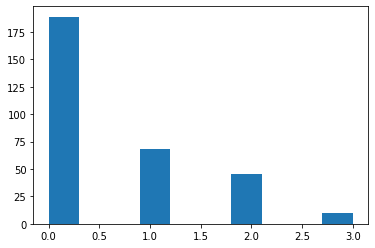

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data["What do you think is the most important stimulus to a scientist"])

In [ ]:
x = list(data["What do you think is the most important stimulus to a scientist"])

In [ ]:
for q in data.keys():
    x = list(data[q])
    print(q)
    i = 0
    while x.count(i)>0:
        print(f"{i}: {x.count(i)}")
        i += 1
    print("\n")

Whom do you consider an ideal scientist?
0: 31
1: 119
2: 48
3: 114


What should be the most accurate metrics to judge the caliber of a scientist?
0: 109
1: 161
2: 40
3: 2


What according to you should be the minimum educational qualification one should have to be considered a scientist?
0: 6
1: 189
2: 51
3: 17
4: 30
5: 17
6: 2


What do you think should be the most developed trait which one should have to become a successful scientist?
0: 16
1: 99
2: 45
3: 51
4: 33
5: 68


What is the first thought which you have when you hear the word 'Scientist'
0: 138
1: 39
2: 101
3: 14
4: 10
5: 10


Why do you think people want to be a scientist?
0: 7
1: 118
2: 148
3: 19
4: 3
5: 17


What should be a scientist’s first priority?
0: 58
1: 129
2: 80
3: 45


Do you think that scientists should be allowed to conduct unethical experiments for the sake of science
0: 121
1: 57
2: 134


Should a scientist prioritize science over social ethics and social norms for the sake of greater good
0: 165
1: 147


W